In [49]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [50]:
train_loan_data = pd.read_csv("train_loan_prediction.csv")
train_loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [51]:
train_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [52]:
#profile = ProfileReport(train_loan_data, title="Report")
#profile

In [53]:
train_loan_data.drop("Loan_ID", axis=1, inplace = True)

In [54]:
train_loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
def null_values(df: pd.DataFrame)->pd.Series:
    return df.isna().sum()

null_values(train_loan_data)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
train_loan_data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [57]:
train_loan_data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [58]:
train_loan_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [59]:
train_loan_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
train_loan_data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]]

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0
...,...,...,...
609,71.0,360.0,1.0
610,40.0,180.0,1.0
611,253.0,360.0,1.0
612,187.0,360.0,1.0


In [61]:
train_loan_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [62]:
train_loan_data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [63]:
def cleaning_null_values(df: pd.DataFrame)->pd.DataFrame:
    '''
    Fill in the null values
    '''
    cols = df[["Dependents", "Married", "Gender", "Self_Employed", "Loan_Amount_Term", "Credit_History"]]
    for i in cols:
        df[i].fillna(df[i].mode().iloc[0], inplace = True)
    
    df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
    
    return df

In [64]:
train_loan_data_cleaned = cleaning_null_values(train_loan_data)

In [65]:
train_loan_data_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [66]:
train_loan_data_cleaned.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

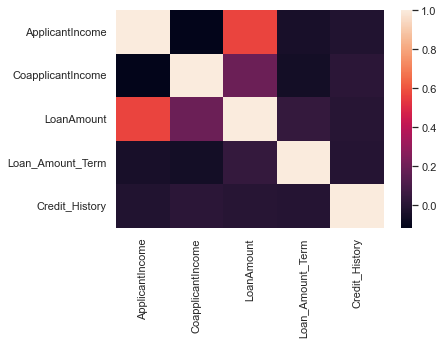

In [67]:
correlation = train_loan_data_cleaned.corr()

sns.heatmap(correlation, annot=False)

In [68]:
def bar_chart(col): 
    Approved = train_loan_data_cleaned[train_loan_data_cleaned["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = train_loan_data_cleaned[train_loan_data_cleaned["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    df1.plot(kind="bar")

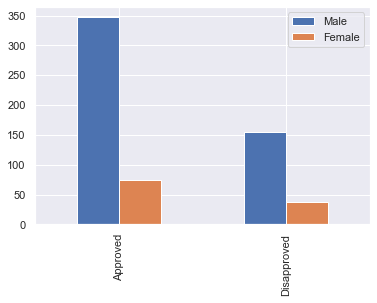

In [69]:
bar_chart("Gender")

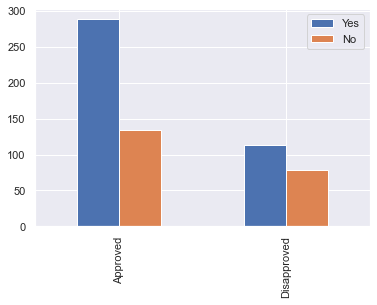

In [70]:
bar_chart("Married")

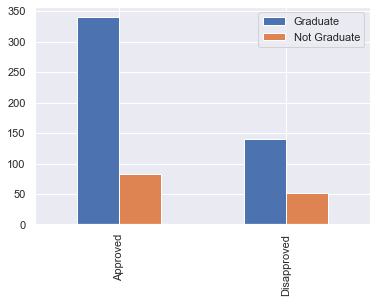

In [71]:
bar_chart("Education")

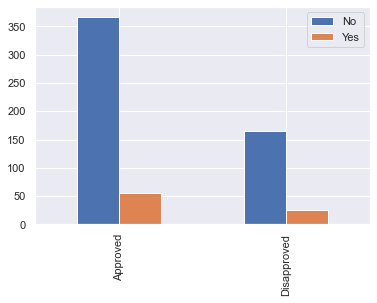

In [72]:
bar_chart("Self_Employed")

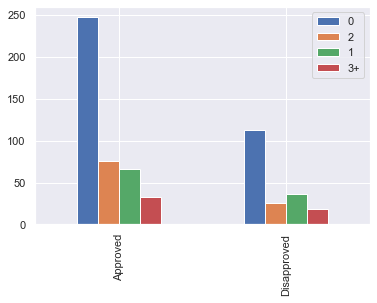

In [73]:
bar_chart("Dependents")

In [35]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
train_loan_data_cleaned[["Gender",'Married','Education', 'Dependents', 'Self_Employed','Property_Area','Loan_Status']] = ord_enc.fit_transform(train_loan_data_cleaned[["Gender",'Married','Education', 'Dependents', 'Self_Employed','Property_Area','Loan_Status']]).astype("int")
train_loan_data_cleaned.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [74]:
train_loan_data_cleaned

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
from sklearn.model_selection import train_test_split 

X = train_loan_data_cleaned.drop("Loan_Status", axis = 1)
y = train_loan_data_cleaned["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
import joblib
joblib.dump(scaler, 'scaling.pkl')

['scaling.pkl']

In [77]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def classification_score(y_true: pd.Series, y_pred: pd.Series): 
    '''
    Precision Score -> Percentage of the predicted positive results that were correctly classified => High precision =  high quality positive results
    Recall Score -> Percentage of the actual positives that were correctly classified
    Accuracy Score -> Percentage of correctly predicted observations
    '''
    pre=  round(precision_score(y_true, y_pred),2)
    rec = round(recall_score(y_true, y_pred), 2)
    acc = round(accuracy_score(y_true, y_pred), 2) 
    
    print(pre) 
    print(rec) 
    print(acc)

In [78]:
from sklearn.naive_bayes import GaussianNB 

gfc = GaussianNB() 
gfc.fit(X_train, y_train) 
pred1 = gfc.predict(X_test)

In [79]:
classification_score(y_test, pred1)

0.76
0.98
0.78


In [80]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.697 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [81]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [82]:
svc = SVC(C= 0.1, gamma= 1, kernel= 'rbf')  
svc.fit(X_train, y_train) 
pred2 = svc.predict(X_test) 
classification_score(y_test,pred2)

0.65
1.0
0.65


In [83]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb.fit(X_train, y_train) 
pred3 = xgb.predict(X_test) 
classification_score(y_test, pred3)

0.77
0.89
0.76


In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    
    # Extract best score
    best_score = rand_clf.best_score_

    # Print best score
    print("Training score: {:.3f}".format(best_score))

    # Predict test set labels
    y_pred = best_model.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

In [85]:

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.815
Test score: 0.789


DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [86]:
ds = DecisionTreeClassifier(max_depth=8, max_features=0.9, max_leaf_nodes=30,
                       min_impurity_decrease=0.05, min_samples_leaf=0.02,
                       min_samples_split=10, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random') 
ds.fit(X_train, y_train) 
pred4 =ds.predict(X_test) 
classification_score(y_test, pred4)

0.76
0.99
0.79


In [87]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2)) 

Training score: 0.815
Test score: 0.789


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [88]:
import joblib 
joblib.dump(ds, "classification_model.pkl") 
model = joblib.load('classification_model.pkl') 
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])